# 训练模型

In [1]:
import tensorflow as tf
tf.enable_eager_execution()

In [2]:
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

In [3]:
dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(mnist_images[..., tf.newaxis] / 255, tf.float32),
    tf.cast(mnist_labels, tf.int64))
)

In [4]:
dataset = dataset.shuffle(1000).batch(32)

In [5]:
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, [3, 3], activation = 'relu'),
    tf.keras.layers.Conv2D(16, [3, 3], activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10)
])

In [6]:
for images, labels in dataset.take(1):
    print(images.shape)
    print(labels.shape)
    print('Logits: ',  mnist_model(images[0:1].numpy()))

Instructions for updating:
Colocations handled automatically by placer.
(32, 28, 28, 1)
(32,)
Logits:  tf.Tensor(
[[ 0.00558332 -0.01906037 -0.00250874 -0.01626959 -0.03296115  0.00356139
  -0.01901532  0.01359591 -0.02787249  0.01063885]], shape=(1, 10), dtype=float32)


## 自定义train loop

In [7]:
optimizer = tf.train.AdamOptimizer()
loss_history = []

In [8]:
for (batch, (images, labels)) in enumerate(dataset.take(400)):
    if batch % 10 == 0:
        print('.', end = '')
    with tf.GradientTape() as tape:
        logits = mnist_model(images, training = True)
        loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)
    loss_history.append(loss_value.numpy())
    grads = tape.gradient(loss_value, mnist_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables),
                             global_step = tf.train.get_or_create_global_step())

Instructions for updating:
Use tf.cast instead.
.......................................

In [9]:
import matplotlib.pyplot as plt

/Users/rosen/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Text(0, 0.5, 'Loss[entropy]')

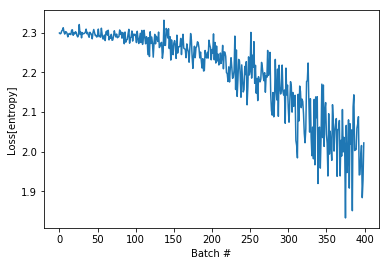

In [10]:
plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss[entropy]')